In [87]:
import numpy as np, matplotlib.pyplot as plt, pandas as pd
import mplhep as hep
hep.style.use("CMS")

In [88]:
proposal_values=pd.DataFrame(dict(Q2=[5.0,6.5,8.0,9.5], 
                                  Ee=[11.0, 11.0, 11.0, 11.0], 
                                  W=[2.43,2.74,3.02,3.09], 
                                  t=[-.40, -.40, -.40, -.48],
                                  thd_ep=[16.28, 22.13, 32.37, 47.71],
                                  E_ep=[5.67, 4.010, 2.340, 1.320],
                                  thd_pi=[15.96,11.72,7.90,5.52],
                                  p_pi=[5.11, 6.771,8.442, 9.420],
                                  k_pi=[0.67, 0.67, 0.67, 0.74]
                                 ))
proposal_values['th_ep']=np.pi/180*proposal_values.thd_ep
proposal_values['th_pi']=np.pi/180*proposal_values.thd_pi

In [89]:
df=proposal_values
print(df.eval("Q2/(2*.9383*(Ee-E_ep))"))

0    0.499886
1    0.495524
2    0.492267
3    0.522970
dtype: float64


In [90]:
df=proposal_values
print(df.eval("sqrt(p_pi**2+.1359**2)/(Ee-E_ep)"))

0    0.959063
1    0.968865
2    0.974953
3    0.973242
dtype: float64


In [91]:
df=proposal_values
print(df.eval("-Q2+.1396**2+2*p_pi*sqrt(Q2+(Ee-E_ep)**2)-2*sqrt(p_pi**2+.1396**2)*(Ee-E_ep)-t"))


0   -0.001393
1   -0.000813
2    0.000541
3    0.001152
dtype: float64


In [92]:
def plot(df):
    
    #calculate the x and z components of the central momentum settings of the HMS and SHMS listed in the dataframe.  
    Pz1=df.eval(f"p_pi*cos(th_pi)")
    Px1=df.eval(f"p_pi*sin(th_pi)")
    Pz2=df.eval(f"E_ep*cos(th_ep)")
    Px2=df.eval(f"-E_ep*sin(th_ep)")
    
    #now plot these values.  The length of the lines represent the magnitude of the central moemntum in the detector.   
    for i in range(len(df)):
        plt.plot([Px1[i],0,Px2[i]], [Pz1[i],0,Pz2[i]], label=f'$Q^2$={df.Q2[i]:.2} GeV$^2/c^2$', lw=2)
    

    
    #now show the beamline 
    plt.plot([0,0], [-df.Ee[0], 0], ls='-', color='k',lw=2)

    #now show the ranges of values that can be set for the SHMS and HMS central momentum vectors
    from matplotlib.patches import Polygon
    #theta min, theta max, pmin, pmax of central kinematics, in the HMS and SHMS
    for ranges in ((-10.5, -90, 0.4, 7.3), (5.5,25, 2.5,11)):
        points= np.array([np.concatenate(([ranges[2]*f(ranges[0]*np.pi/180), ranges[3]*f(ranges[0]*np.pi/180)], 
                           ranges[3]*f(np.linspace(ranges[0]*np.pi/180, ranges[1]*np.pi/180, 20)),
                           [ranges[3]*f(ranges[1]*np.pi/180), ranges[2]*f(ranges[1]*np.pi/180)], 
                           ranges[2]*f(np.linspace(ranges[1]*np.pi/180, ranges[0]*np.pi/180, 20))))\
                        for f in (np.sin, np.cos)])
        points=np.transpose(points)
        plt.gca().add_patch(Polygon(points, color='0.8', zorder=-1))

    #now show as dashed lines the limits of acceptance when the HMS and SHMS are at their extreme values
    for ranges in ((-10.5+.032*180/np.pi, -90-.032*180/np.pi, 0.4*.9, 7.3*1.1),\
                   (5.5-0.018*180/np.pi,25+0.018*180/np.pi, 2.5*.85,11*1.25)):
        points= np.array([np.concatenate(([ranges[2]*f(ranges[0]*np.pi/180), ranges[3]*f(ranges[0]*np.pi/180)], 
                           ranges[3]*f(np.linspace(ranges[0]*np.pi/180, ranges[1]*np.pi/180, 20)),
                           [ranges[3]*f(ranges[1]*np.pi/180), ranges[2]*f(ranges[1]*np.pi/180)], 
                           ranges[2]*f(np.linspace(ranges[1]*np.pi/180, ranges[0]*np.pi/180, 20))))\
                        for f in (np.sin, np.cos)])
        plt.gca().plot(*points, color='0.8', zorder=-1, ls='--')

    #label the two spectrometers
    plt.text(10, 5, "SHMS, $\\pi^+$")
    plt.text(-4, 8, "HMS, $e^-$")
    
    #miscellaneous formatting of the plot
    plt.gca().set_aspect(1)
    plt.legend()
    plt.xlabel("$P_x$ [GeV]")
    plt.ylabel("$P_z$ [GeV]")
    plt.xlim(14, -14) #this has the x axis be positive on the left side, as is convention for bird's eye view
    plt.ylim(-14, 14)

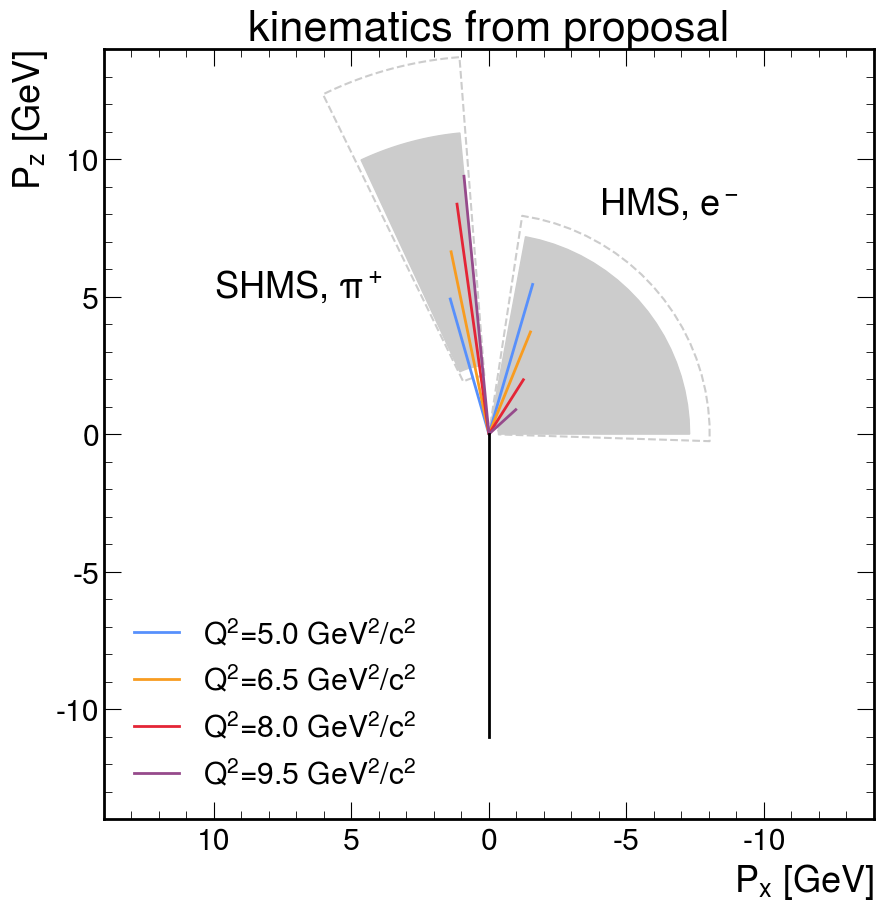

In [94]:
plot(proposal_values)
plt.gca().set_title("kinematics from proposal")
plt.show()

In [8]:
print(df.eval("arctan2(E_ep*sin(th_ep),(Ee-E_ep*cos(th_ep)))-th_pi")*180/np.pi)

0    0.001280
1   -0.005911
2    0.004172
3   -0.004207
dtype: float64


In [11]:
print(df.eval("sqrt((E_ep*sin(th_ep))**2+(Ee-E_ep*cos(th_ep))**2)-p_pi"))

0    0.670188
1    0.669372
2    0.668168
3    0.738832
dtype: float64


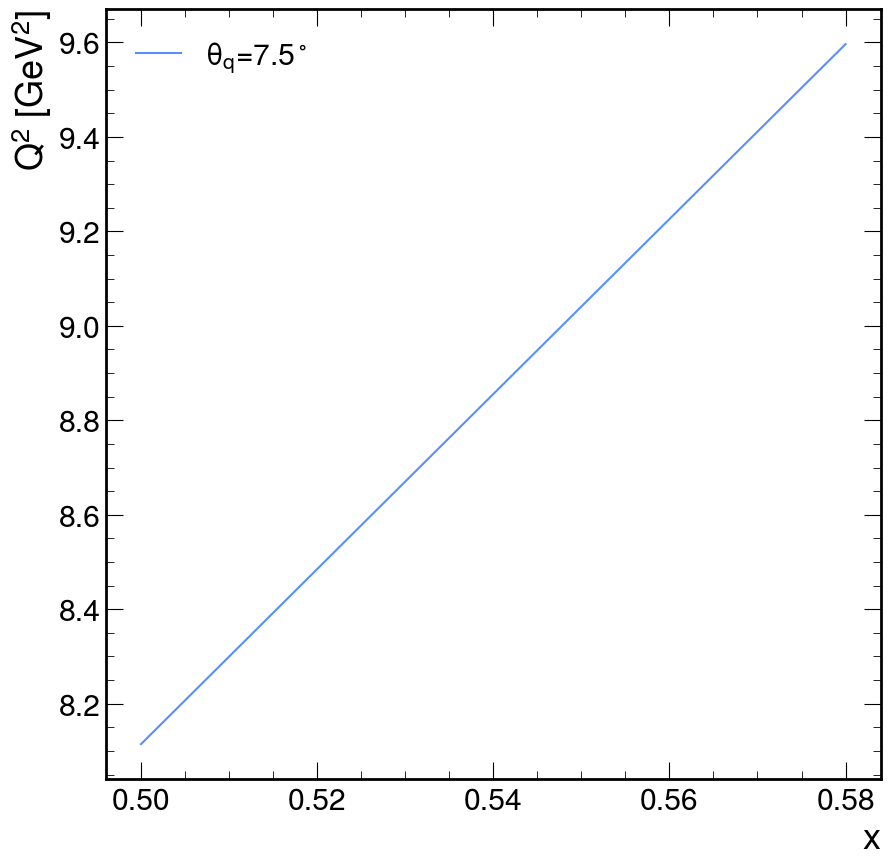

In [14]:
theta_q_deg=7.5

c=np.cos(theta_q_deg*np.pi/180)
s=np.sin(theta_q_deg*np.pi/180)
m=0.9383
E=10.7

x=np.linspace(0.5,0.58)
Q2=4*c**2*E**2*m**2*x**2/(s**2*E**2+2*E*m*x+m**2*x**2)

plt.plot(x,Q2, label=f'$\\theta_q$={theta_q_deg}$^\\circ$')
plt.xlabel("x")
plt.ylabel("$Q^2$ [GeV$^2$]")
plt.legend()
plt.show()

#arctan2(E_ep*sin(th_ep), Ee-E_ep*cos(th_ep))

# determine new kinematics

In [66]:
Ee=10.7
min_theta_pi=7.5*np.pi/180
m=0.93827208943
df=pd.DataFrame()
#df['Q2']=[5.0,6.5,9.5,8.0]
df['Q2']=[5.0,6.5,8.5,7.5] # change last Q2 bin to 8.5

df['t']=[-0.4,-0.4,-0.4,-0.4]

# adjust the values of x and k_pi such that
# 
# x is 0.5 and t is 0.40 (0.48 for last bin), if doing so allows theta to be >= 7.5 degrees.
# Otherwise get the values as close as possible to these values


#calculate the minimum value of x such that theta_q=theta_pi is at least 7.5 degrees
#xcalc=(E*df.Q2+E*np.cos(min_theta_pi)*np.sqrt((4*np.sin(min_theta_pi)**2*E**2+df.Q2)*df.Q2))/\
#               (m*(4*np.cos(min_theta_pi)**2*E**2-df.Q2))

sth2=np.sin(min_theta_pi)**2
cth=np.cos(min_theta_pi)
xcalc=(sth2*Ee*df.Q2)/\
        (-m*df.Q2+m*cth*np.sqrt(df.Q2*(4*sth2*Ee**2+df.Q2)))

print(xcalc)
df['x']=0.5*(xcalc<0.5)+xcalc*(xcalc>=0.5)

df['Ee']=[Ee]*len(df)
df['E_ep']=df.eval(f'Ee-Q2/(2*{m}*x)')
df['th_ep']=df.eval('2*arcsin(sqrt(Q2/(4*Ee*E_ep)))')
df['th_pi']=df.eval('arctan2(E_ep*sin(th_ep), Ee-E_ep*cos(th_ep))')
df['q']=df.eval("sqrt((E_ep*sin(th_ep))**2+(Ee-E_ep*cos(th_ep))**2)")
df['nu']=df.eval('Ee-E_ep')

df['p_pi']=df.eval("1/(2*Q2)*(-q*.1396**2+q*Q2+q*t+nu*sqrt(.1396**4+(Q2+t)**2-2*.1396**2*(-Q2+t)))")
#df['p_pi']=df.eval('q-k_pi')

df['k_pi']=df.eval('q-p_pi')
df['thd_pi']=df.th_pi*180/np.pi
df['thd_ep']=df.th_ep*180/np.pi

mp=0.9383
mD=1.875612945
mC=11.178
mCu=58.602

# df['Mmiss_p']=df.eval(f"sqrt((Ee-E_ep-sqrt(p_pi**2+.1396**2)+.9383)**2-(-E_ep*sin(th_ep)+p_pi*sin(th_pi))**2-(Ee-E_ep*cos(th_ep)-p_pi*cos(th_pi))**2)")
# df['Mmiss_D']=df.eval(f"sqrt((Ee-E_ep-sqrt(p_pi**2+.1396**2)+1.876)**2-(-E_ep*sin(th_ep)+p_pi*sin(th_pi))**2-(Ee-E_ep*cos(th_ep)-p_pi*cos(th_pi))**2)")
# df['Mmiss_C']=df.eval(f"sqrt((Ee-E_ep-sqrt(p_pi**2+.1396**2)+11.178)**2-(-E_ep*sin(th_ep)+p_pi*sin(th_pi))**2-(Ee-E_ep*cos(th_ep)-p_pi*cos(th_pi))**2)")
# df['Mmiss_Cu']=df.eval(f"sqrt((Ee-E_ep-sqrt(p_pi**2+.1396**2)+58.602)**2-(-E_ep*sin(th_ep)+p_pi*sin(th_pi))**2-(Ee-E_ep*cos(th_ep)-p_pi*cos(th_pi))**2)")


df['W']=df.eval(f"sqrt({m}**2+2*(Ee-E_ep)*{m}-Q2)")
df['t']=df.eval("-Q2+.1396**2+2*p_pi*sqrt(Q2+(Ee-E_ep)**2)-2*sqrt(p_pi**2+.1396**2)*(Ee-E_ep)")

#some more variables for debugging
df['z']=df.eval("sqrt(.1396**2+p_pi**2)/(Ee-E_ep)")
df['y']=df.eval("(Ee-E_ep)/Ee")

df_kinematics=df
df_kinematics

0    0.331296
1    0.412795
2    0.520827
3    0.466849
Name: Q2, dtype: float64


,Q2,t,x,Ee,E_ep,th_ep,th_pi,q,nu,p_pi,k_pi,thd_pi,thd_ep,W,z,y
0,5.0,-0.4,0.500000,10.7,5.371055,0.296040,0.274575,5.779070,5.328945,5.110607,0.668463,15.731974,16.961841,2.424944,0.959386,0.498032
1,6.5,-0.4,0.500000,10.7,3.772372,0.404032,0.202278,7.381872,6.927628,6.715134,0.666738,11.589669,23.149315,2.716681,0.969536,0.647442
2,8.5,-0.4,0.520827,10.7,2.003055,0.640654,0.130900,9.172614,8.696945,8.514756,0.657858,7.500000,36.706796,2.949671,0.979183,0.812799
3,7.5,-0.4,0.500000,10.7,2.706583,0.514553,0.158306,8.449539,7.993417,7.783573,0.665966,9.070263,29.481690,2.894884,0.973905,0.747048


In [16]:
print(df.eval("Q2-4*Ee*E_ep*sin(th_ep/2)**2"))
print(df.eval("x-(4*Ee*E_ep*sin(th_ep/2)**2)/(2*.93827208943*(Ee-E_ep))"))

print(df.thd_pi)

0   -8.881784e-16
1   -1.776357e-15
2    1.776357e-15
3   -1.776357e-15
dtype: float64
0   -1.110223e-16
1   -1.110223e-16
2    1.110223e-16
3   -1.110223e-16
dtype: float64
0    15.731974
1    11.589669
2     7.500000
3     9.070263
Name: thd_pi, dtype: float64


In [17]:
#print these out to put them in the table
df=df_kinematics
for i in range(len(df)):
    print(f"{df.Q2[i]:.1f} & {df.Ee[i]:.1f} & {df.W[i]:.2f} & {df.t[i]:.2f} & {df.thd_ep[i]:.2f}  & {df.E_ep[i]:.3f}  & {df.thd_pi[i]:.2f} & {df.p_pi[i]:.3f} & {df.k_pi[i]:.2f} \\\\"\
         .replace("-", "$-$"))

5.0 & 10.7 & 2.42 & $-$0.40 & 16.96  & 5.371  & 15.73 & 5.111 & 0.67 \\
6.5 & 10.7 & 2.72 & $-$0.40 & 23.15  & 3.772  & 11.59 & 6.715 & 0.67 \\
8.5 & 10.7 & 2.95 & $-$0.40 & 36.71  & 2.003  & 7.50 & 8.515 & 0.66 \\
7.5 & 10.7 & 2.89 & $-$0.40 & 29.48  & 2.707  & 9.07 & 7.784 & 0.67 \\


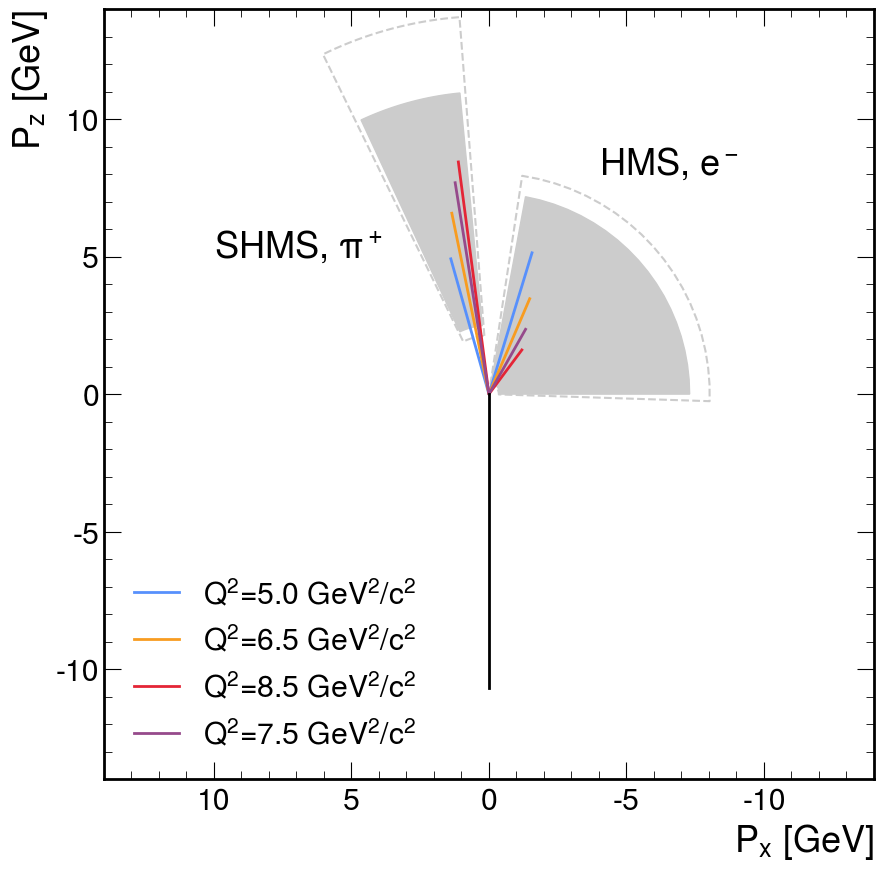

In [18]:
plot(df_kinematics)

# Create input files for beagle event generation

In [80]:
min_y=df_kinematics.eval("(Ee-E_ep*1.1)/Ee")
max_y=df_kinematics.eval("(Ee-E_ep*0.9)/Ee")
min_Q2=df_kinematics.eval("4*Ee*E_ep*0.9*sin((th_ep-.032)/2)**2")
max_Q2=df_kinematics.eval("4*Ee*E_ep*1.1*sin((th_ep+.032)/2)**2")
min_theta=df_kinematics.eval("th_ep-.032")
max_theta=df_kinematics.eval("th_ep+.032")
print("yMin yMax Q2Min Q2Max thetaMin thetaMax")
for i in range(4):
    print(f"{min_y[i]:.2f} {max_y[i]:.2f} {min_Q2[i]:.1f} {max_Q2[i]:.1f} {min_theta[i]:.3f} {max_theta[i]:.3f}")

yMin yMax Q2Min Q2Max thetaMin thetaMax
0.45 0.55 3.6 6.7 0.264 0.328
0.61 0.68 5.0 8.3 0.372 0.436
0.79 0.83 6.9 10.3 0.609 0.673
0.72 0.77 6.0 9.3 0.483 0.547


In [83]:
targets={"1H":(1,1), "2H":(2,1),"12C":(12,6), "63C":(63,29)}

In [84]:
! mkdir -p beagle/input
for i in range(4):
    for t in targets:
        with open(f"beagle/input/{t}_{df.Q2[i]}.inp","w") as f:
            print(f"""**********************************************************************
* Example for a DTUNUC input file.
* Uncomment the input-cards according to your requirements.
*
* Format: A10,6E10.0,A8
*        (except for the section enclosed by "PHOINPUT" and "ENDINPUT"
*         which is format-free)
*         lines starting with "*" are comment lines
**********************************************************************
*
* projectile / target
* -------------------
PROJPAR                                                               ELECTRON
TARPAR          {targets[t][0]}      {targets[t][1]}
TAUFOR          9.0        25.0       1.0
FERMI           2          0.62       1        0
* random number
* FSEED            13        -1         3         3
* output file with the name of fort.xx (xx=21-99)
OUTPUT           92
* energy of interaction
* ---------------------
*	     momentum of beam1||momentum of beam2
MOMENTUM         {df.Ee[i]}       0 
*	decay of pi0  2/0  decay/not decayed   
PARDECAY            2
*	treatment of diffractive events
*DIFFRACT         -3         0         0         0
* lepton tagger to sample events with certain kinematics cuts
*		yMin      yMax    Q2Min    Q2Max   theta_Min theta_Max 
L-TAG           {min_y[i]:.2f}      {max_y[i]:.2f}      {min_Q2[i]:.1f}    {max_Q2[i]:.1f}       {min_theta[i]:.3f}      {max_theta[i]:.3f}
*VDM-PAR2           1        1         0
* model selection
USERSET          15           9.0
MODEL                                                                 PYTHIA  
* if PYTHIA model specify pythia input cards
PY-INPUT                                                              eDS1noq
* PHOJET-specific input
* ---------------------
* The following lines control the event-generation with PHOJET for
* individual photon/nucleon-nucleon collisions.
* For details see the PHOJET-manual available at
*        http://lepton.bartol.udel.edu/~eng/phojet.html
* Any options explained in the PHOJET-manual can be used in between
* the "PHOINPUT" and "ENDINPUT" cards.
PHOINPUT
PROCESS           1 1 1 1 1 1 1 1
ENDINPUT
*
* Output
* ------
*   some default output (particle multiplicities etc.)
HISTOGRAM      101.0     102.0
*
* Start of event generation
* -------------------------
*		number of events
START           1E5         0.0
STOP
*...+....1....+....2....+....3....+....4....+....5....+....6....+....7...""", file=f)


# Cherenkov settings

pressure 0    0.950000
1    0.950000
3    0.924992
2    0.773195
Name: p_pi, dtype: float64


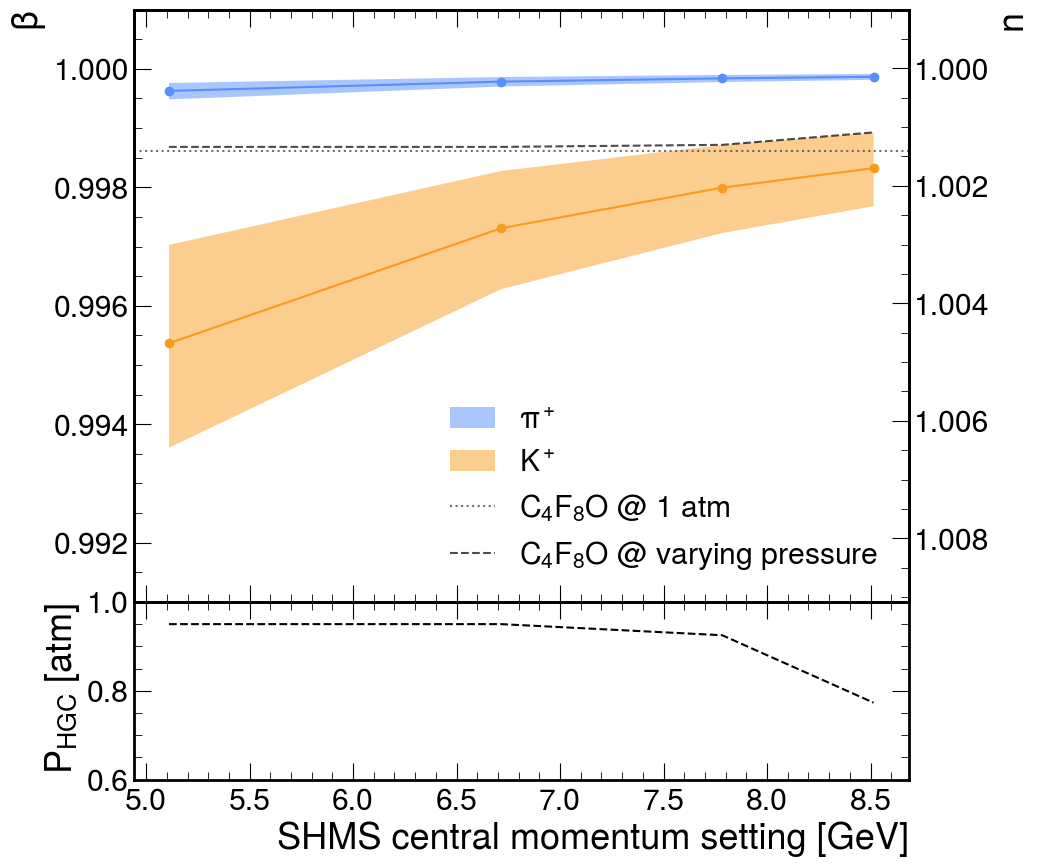

5.0 & 5.111 & 1.00132 & 0.95 \\
6.5 & 6.715 & 1.00132 & 0.95 \\
7.5 & 7.784 & 1.00128 & 0.92 \\
8.5 & 8.515 & 1.00107 & 0.77 \\


In [21]:
df=df_kinematics.reindex([0,1,3,2])

fig,axs=plt.subplots(2,1,gridspec_kw={'height_ratios': [1, 0.3]},sharex='all')

plt.sca(axs[0])

beta_pi=df.eval('p_pi/sqrt(p_pi**2+ 0.1396 **2)')
beta_K=df.eval('p_pi/sqrt(p_pi**2+ 0.493677 **2)')
beta_p=df.eval('p_pi/sqrt(p_pi**2+ 0.9383 **2)')
plt.plot(df.p_pi, beta_pi, marker='o')
plt.plot(df.p_pi, beta_K, marker='o')
#plt.plot(df.p_pi, beta_p, marker='o')

#beta_pi_plus=df.eval(f'p_pi*{a}/sqrt((p_pi*{a})**2+ 0.1396 **2)')
#beta_K_plus=df.eval(f'p_pi*{a}/sqrt((p_pi*{a})**2+ 0.493677 **2)')
#beta_p_plus=df.eval(f'p_pi*{a}/sqrt((p_pi*{a})**2+ 0.9383 **2)')
alpha=0.5
plt.fill_between(df.p_pi, *(df.eval(f'p_pi*{a}/sqrt((p_pi*{a})**2+ 0.1396 **2)') for a in (0.85, 1.25)), alpha=alpha, label='$\\pi^+$')
plt.fill_between(df.p_pi, *(df.eval(f'p_pi*{a}/sqrt((p_pi*{a})**2+ 0.493677 **2)') for a in (0.85, 1.25)), alpha=alpha, label='$K^+$')
#plt.fill_between(df.p_pi, *(df.eval(f'p_pi*{a}/sqrt((p_pi*{a})**2+ 0.9383 **2)') for a in (0.85, 1.25)), alpha=alpha, label='p')



plt.ylabel("$\\beta$")

#plt.axhline(1/1.015, ls='--', color='0.5', alpha=0.7, label='Aerogel')

plt.axhline(1/1.001389, ls=':', color='0.3', alpha=0.8, label='$C_4F_8O$ @ 1 atm') #https://arxiv.org/pdf/2304.10016  Bill Li dissertation

#P=np.array((.95, .95, .81, .67))
P=(1-df.eval(f'p_pi*{1.25}/sqrt((p_pi*{1.25})**2+ 0.493677 **2)'))/(1.001389-1)

P=(P>.95)*.95+P*(P<0.95)
#P=np.array((.65, .65, .65, .65))
n=1+P*(1.001389-1)
#print(1/n)
#print([df.eval(f'p_pi*{a}/sqrt((p_pi*{a})**2+ 0.493677 **2)') for a in (1.25,)])
print("pressure", P)

plt.plot(df.p_pi, 1/n, ls='--', color='0', alpha=0.7, label='$C_4F_8O$ @ varying pressure')

plt.legend()

ax1=plt.gca()
ax1.set_ylim(0.991, 1.001)
ax2 = plt.gca().twinx()
ax2.set_ylim(1/ax1.get_ylim()[0],1/ax1.get_ylim()[1])
ax2.set_ylabel("n")

plt.sca(axs[1])
plt.subplots_adjust(hspace=0)
plt.ylabel("$P_{HGC}$ [atm]")
plt.plot(df.p_pi, P, color='0', alpha=1,ls='--')
plt.ylim(0.6, 1)
plt.xlabel("SHMS central momentum setting [GeV]")
#df.eval('sqrt(p_pi**2+ 0.493677 **2)/(Ee-E_ep)')
plt.show()
for i in (0,1,3,2):
    print(f"{df.Q2[i]} & {df.p_pi[i]:.3f} & {n[i]:.5f} & {P[i]:.2f} \\\\")

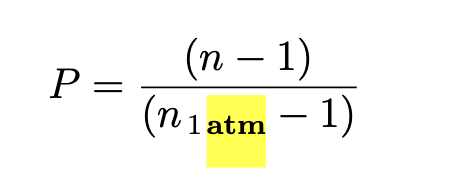


# New runtime

In [25]:
df_runtime=pd.DataFrame(\
    {"Q2":(5.0, 6.5, 8.0, 9.5), 
     "Uncertainty":(1,2,3,3), 
     "t1H":(2,2.5,5,34),
     "n1H":(3,3,2,2),
     "t2H":(2,2.5,5,34), 
     #"t12C": (2.5+6,3+7, 6,41),
     "t12C": (2.5,3, 6,41),
     "t63Cu": (10, 12.5,25,170)})

In [26]:
df_runtime['ttot']=df_runtime.eval("t1H+t2H+t12C+t63Cu")
df_runtime

,Q2,Uncertainty,t1H,n1H,t2H,t12C,t63Cu,ttot
0,5.0,1,2.0,3,2.0,2.5,10.0,16.5
1,6.5,2,2.5,3,2.5,3.0,12.5,20.5
2,8.0,3,5.0,2,5.0,6.0,25.0,41.0
3,9.5,3,34.0,2,34.0,41.0,170.0,279.0


In [59]:
df=df_runtime.copy()
df[f"Q2"]=(5.0, 6.5, 7.5, 8.5)
df[f"Uncertainty"]=(1,2,2.5,2.5)
scale=1.2#dipangkar's number

for a in "1H", "2H", "12C", "63Cu":
    for i in 0,1:
        b=scale*df_runtime[f't{a}'][i]
        df.loc[i,f't{a}']=np.round(b,1)
    for i in 2,3:
        interp=(df.Q2[i]-df_runtime.Q2[i-1])/(df_runtime.Q2[i]-df_runtime.Q2[i-1])

        interp=(np.exp(df.Q2[i])-np.exp(df_runtime.Q2[i-1]))/(np.exp(df_runtime.Q2[i])-np.exp(df_runtime.Q2[i-1]))
        #print(interp)
        b=scale*((1-interp)*df_runtime[f't{a}'][i-1]*df_runtime.Uncertainty[i-1]**2+\
                                   interp*df_runtime[f't{a}'][i]*df_runtime.Uncertainty[i]**2)/df.Uncertainty[i]**2
        df.loc[i,f't{a}']=np.round(b,1)
#factor of 2 to account for 40 instead of 80 uA
#we want 1/3 as much statistics
df['tAldummy']=np.round(df.t2H/3,1)
df['ttot']=df.eval("n1H*t1H+t2H+t12C+t63Cu+tAldummy")
df_runtime_new=df
df

,Q2,Uncertainty,t1H,n1H,t2H,t12C,t63Cu,ttot,tAldummy
0,5.0,1.0,2.4,3,2.4,3.0,12.0,25.4,0.8
1,6.5,2.0,3.0,3,3.0,3.6,15.0,31.6,1.0
2,7.5,2.5,5.2,2,5.2,6.3,26.2,49.8,1.7
3,8.5,2.5,18.0,2,18.0,21.6,89.9,171.5,6.0


In [60]:
print(np.sum(df_runtime_new['ttot']))

278.3


In [61]:
for i in (0,1,3,2):
    #if i ==0:
    #    t12Cstr=f"2.5+{df_runtime_new.t12C[i]-2.5:.0f}"
    #elif i ==1:
    #    t12Cstr=f"3+{df_runtime_new.t12C[i]-3.0:.0f}"
    #else:
    #    t12Cstr=f"{df_runtime_new.t12C[i]-3.0:.1f}"
    t12Cstr=f"{df_runtime_new.t12C[i]:.1f}"
    print(f"{df_runtime_new.Q2[i]:.1f} & {df_runtime_new.Uncertainty[i]} & ${df_runtime_new.t1H[i]:.1f}\\times{df_runtime_new.n1H[i]}$ &"
         f" {df_runtime_new.t2H[i]:.1f} & {t12Cstr} & {df_runtime_new.t63Cu[i]:.1f} & {df_runtime_new.tAldummy[i]:.1f} & {df_runtime_new.ttot[i]:.1f} \\\\")
print("\\hline")
print(f"\multicolumn{{7}}{{r}}{{\\textbf{{Total}}}} & {np.sum(df_runtime_new['ttot']):.1f}")


5.0 & 1.0 & $2.4\times3$ & 2.4 & 3.0 & 12.0 & 0.8 & 25.4 \\
6.5 & 2.0 & $3.0\times3$ & 3.0 & 3.6 & 15.0 & 1.0 & 31.6 \\
8.5 & 2.5 & $18.0\times2$ & 18.0 & 21.6 & 89.9 & 6.0 & 171.5 \\
7.5 & 2.5 & $5.2\times2$ & 5.2 & 6.3 & 26.2 & 1.7 & 49.8 \\
\hline
\multicolumn{7}{r}{\textbf{Total}} & 278.3


Text(0, 1, 'hours*uncertainty^2')

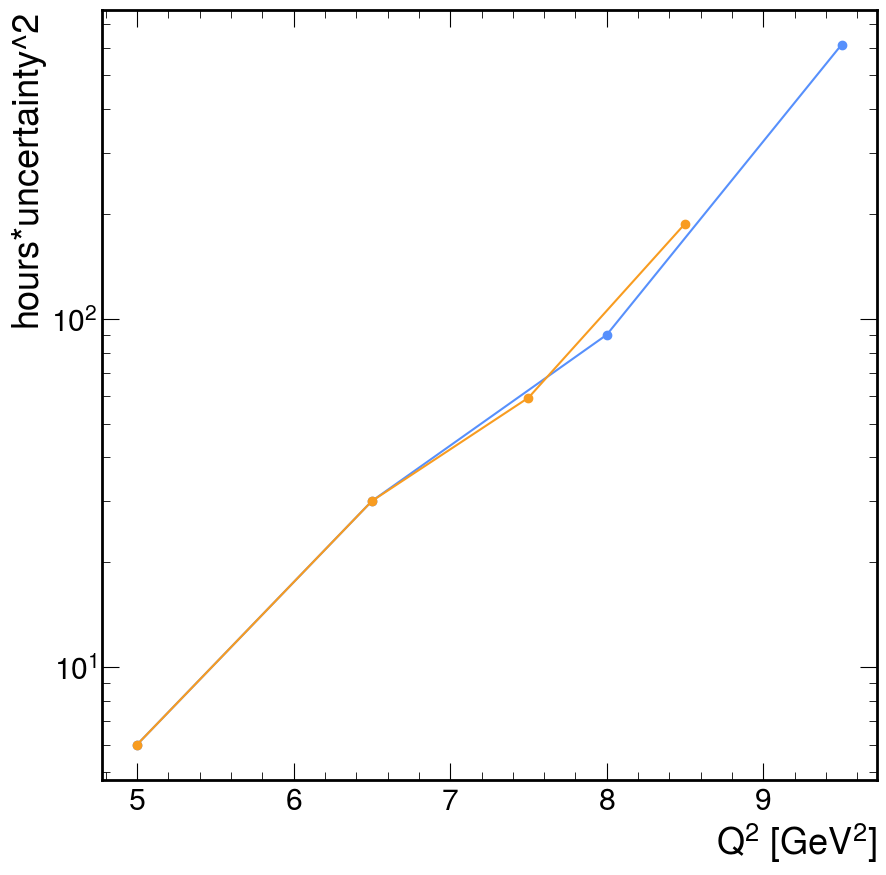

In [181]:
plt.plot(df_runtime.Q2, df_runtime.t1H*df_runtime.Uncertainty**2, marker='o')
#plt.ylim(0)
#plt.xlim(0)
plt.plot(df_runtime_new.Q2, df_runtime_new.t1H*df_runtime_new.Uncertainty**2, marker='o')
plt.yscale('log')
plt.xlabel("$Q^2$ [GeV$^2$]")
           
plt.ylabel("hours*uncertainty^2")

In [62]:
for i in (0,1,3,2):
    for target, a in zip("$^1$H;Al;$^2$H;C (6\\%);$^{63}$Cu".split(";"),"n1H*t1H tAldummy t2H t12C t63Cu".split()):
        beam=80 if target !="Al" else 40
        shifts = df_runtime_new.eval(a+"/4")[i]
        description=f"Q^2={df_runtime_new.Q2[i]:.1f}$ production"
        
        if target in ("C (6\\%)", "$^{63}$Cu") and df.Q2[i]==5.0 :
            includeLumi=True
            shifts+=0.5
            description+=" (+ lumi scan)"
        stats=1.2*(df_runtime_new.Uncertainty[i]*.01)**-2
        if target=="Al":
            stats/=3
        stats_str=f"{stats/1000:.0f}k" if stats>=10000 else f"{stats/1000:.1f}k" if stats>=1000 else f"{round(stats,-1):.0f}"
        if target=='Al':
            stats_str='--'
        print(f"${description} & {target} & {beam} & {shifts:.1f} & {stats_str} & \\\\ \\hline")
        

$Q^2=5.0$ production & $^1$H & 80 & 1.8 & 12k & \\ \hline
$Q^2=5.0$ production & Al & 40 & 0.2 & -- & \\ \hline
$Q^2=5.0$ production & $^2$H & 80 & 0.6 & 12k & \\ \hline
$Q^2=5.0$ production (+ lumi scan) & C (6\%) & 80 & 1.2 & 12k & \\ \hline
$Q^2=5.0$ production (+ lumi scan) & $^{63}$Cu & 80 & 3.5 & 12k & \\ \hline
$Q^2=6.5$ production & $^1$H & 80 & 2.2 & 3.0k & \\ \hline
$Q^2=6.5$ production & Al & 40 & 0.2 & -- & \\ \hline
$Q^2=6.5$ production & $^2$H & 80 & 0.8 & 3.0k & \\ \hline
$Q^2=6.5$ production & C (6\%) & 80 & 0.9 & 3.0k & \\ \hline
$Q^2=6.5$ production & $^{63}$Cu & 80 & 3.8 & 3.0k & \\ \hline
$Q^2=8.5$ production & $^1$H & 80 & 9.0 & 1.9k & \\ \hline
$Q^2=8.5$ production & Al & 40 & 1.5 & -- & \\ \hline
$Q^2=8.5$ production & $^2$H & 80 & 4.5 & 1.9k & \\ \hline
$Q^2=8.5$ production & C (6\%) & 80 & 5.4 & 1.9k & \\ \hline
$Q^2=8.5$ production & $^{63}$Cu & 80 & 22.5 & 1.9k & \\ \hline
$Q^2=7.5$ production & $^1$H & 80 & 2.6 & 1.9k & \\ \hline
$Q^2=7.5$ production & Al & 

In [58]:
12/(18.0*2+18.0)*8

1.7777777777777777

In [64]:
# time proxy in nucleus

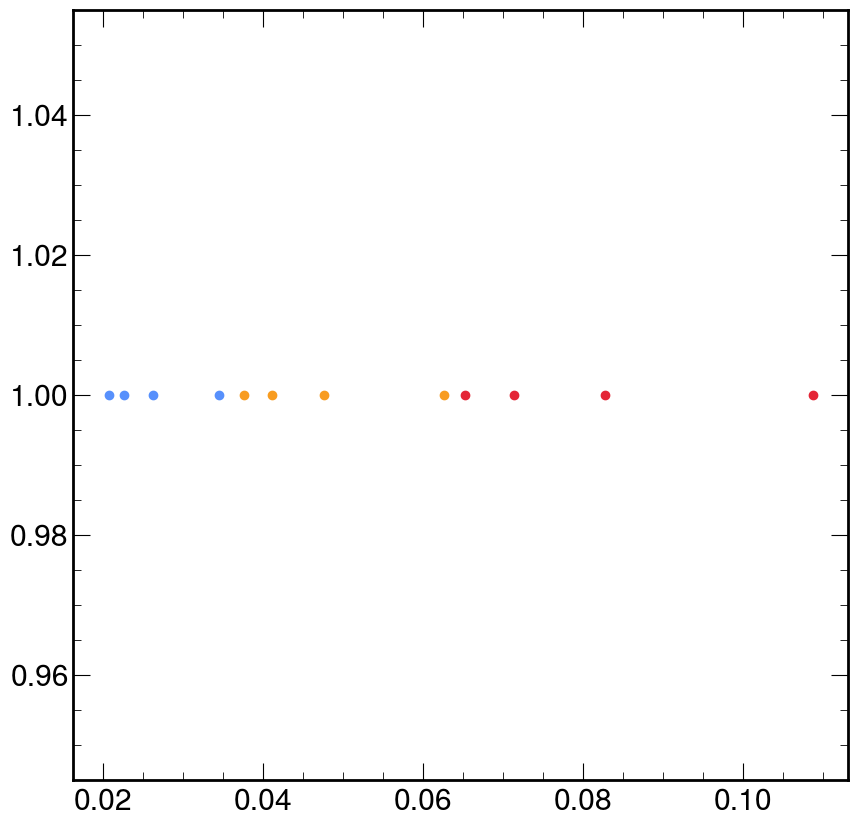

In [69]:
for A in 2,12,63:
    plt.plot(A**(1/3)*df_kinematics.eval(".1396/sqrt(-.1396**2+p_pi**2)"), [1]*4, ls='', marker='o')